## Calibration of lab probes ANK1 ANK2 P20

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes have been bent on purpose.

Probe P20 is used in the profiler.

Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P20

I ran this calibration in situ for ANK1, ANK2 and P20 on the profiler.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
df = pd.read_csv('../calibration_ANK12_P20_02may19/calibration.csv',header=2)
print(df)


    percentage   density  temperature
0            0  0.998180       20.059
1            5  0.999940       20.008
2           10  1.001740       20.024
3           15  1.003740       20.015
4           20  1.005440       20.025
5           25  1.007520       20.011
6           30  1.009300       20.015
7           35  1.011160       20.021
8           40  1.012900       20.015
9           45  1.014620       20.023
10          50  1.016579       20.001
11          55  1.018130       20.010
12          60  1.020040       20.006
13          65  1.021830       20.011
14          70  1.023580       20.012
15          75  1.025340       20.016
16          80  1.027090       20.015
17          85  1.029020       20.018
18          90  1.030600       20.016
19         100  1.034230       20.016


../calibration_ANK12_P20_02may19/000pc.mat
../calibration_ANK12_P20_02may19/005pc.mat
../calibration_ANK12_P20_02may19/010pc.mat
../calibration_ANK12_P20_02may19/015pc.mat
../calibration_ANK12_P20_02may19/020pc.mat
../calibration_ANK12_P20_02may19/025pc.mat
../calibration_ANK12_P20_02may19/030pc.mat
../calibration_ANK12_P20_02may19/035pc.mat
../calibration_ANK12_P20_02may19/040pc.mat
../calibration_ANK12_P20_02may19/045pc.mat
../calibration_ANK12_P20_02may19/050pc.mat
../calibration_ANK12_P20_02may19/055pc.mat
../calibration_ANK12_P20_02may19/060pc.mat
../calibration_ANK12_P20_02may19/065pc.mat
../calibration_ANK12_P20_02may19/070pc.mat
../calibration_ANK12_P20_02may19/075pc.mat
../calibration_ANK12_P20_02may19/080pc.mat
../calibration_ANK12_P20_02may19/085pc.mat
../calibration_ANK12_P20_02may19/090pc.mat
../calibration_ANK12_P20_02may19/100pc.mat


Text(0.5,1,'CH3 - P20 ')

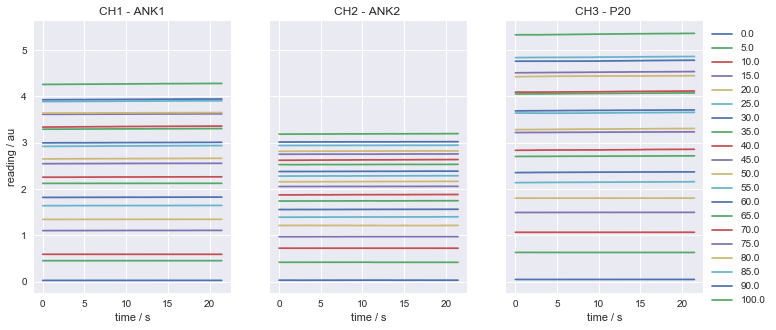

In [11]:
nums = ['100','090','085','080','075','070','065','060','055','050',
        '045','040','035','030','025','020','015','010','005','000']
nums=nums[::-1]
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_ANK12_P20_02may19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')
ax2.set_title('CH3 - P20 ')

ANK1
rho_1 = 0.998102+0.004567r+0.000676r^2+0.000056r^3 

ANK2
rho_2 = 0.997984+0.004090r+0.001643r^2+0.000193r^3 

Probe P
rho_P = 0.998176+0.001940r+0.001296r^2+-0.000073r^3


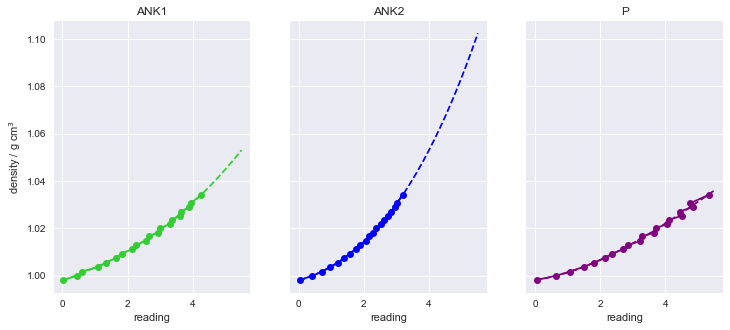

In [14]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,5.5,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax2.set_title('P')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))